<center><h2>FOML Assignment 3: Linear Regression</h2></center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
theta = np.arange(-10, 10.1, 0.1)
L = theta**2


### Define Loss Function
 loss function $L(\theta) = \theta^2$ and calculate its values for a range of $\theta$.

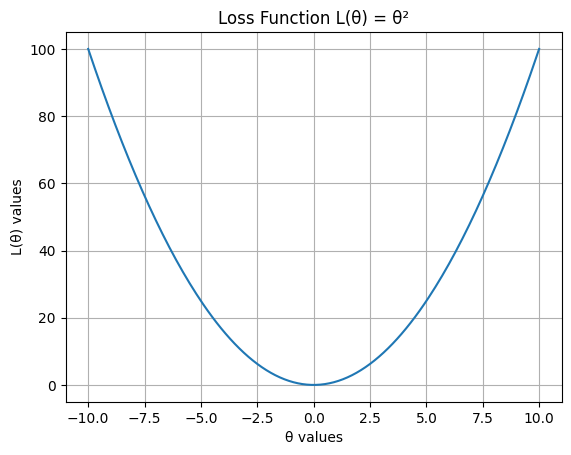

In [4]:
plt.plot(theta, L)
plt.xlabel("θ values")
plt.ylabel("L(θ) values")
plt.title("Loss Function L(θ) = θ²")
plt.grid()
plt.show()


### Loss Function
loss function $L(\theta)$ to visualize how it changes with $\theta$.

In [5]:
min_value = np.min(L)
best_theta = theta[np.argmin(L)]
print("Minimum Loss =", min_value)
print("Best θ =", best_theta)


Minimum Loss = 1.2621774483536189e-27
Best θ = -3.552713678800501e-14


### Minimum Loss and Best θ
the value of $\theta$ that minimizes the loss function

In [6]:
theta1 = np.arange(-10, 10.1, 0.1)
theta2 = np.arange(-10, 10.1, 0.1)
T1, T2 = np.meshgrid(theta1, theta2)
L = T1**2 + T2**2


### 2D Loss Function
extend the loss function to two variables $\theta_1$ and $\theta_2$ and compute $L(\theta_1, \theta_2) = \theta_1^2 + \theta_2^2$.

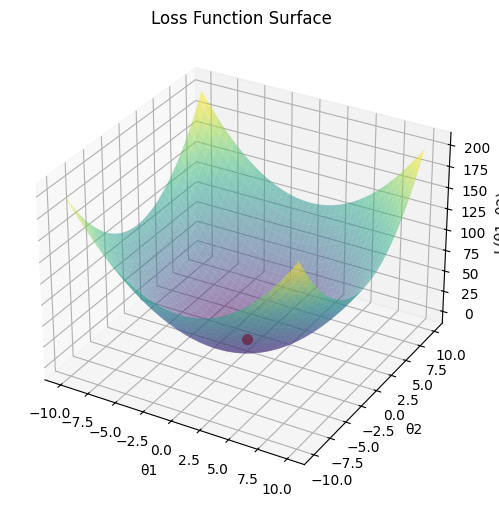

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(T1, T2, L, cmap="viridis" , alpha=0.5 )
best_theta1 = theta1[np.argmin(np.min(L, axis=0))]
best_theta2 = theta2[np.argmin(np.min(L, axis=1))]
best_loss = np.min(L)
ax.scatter(best_theta1, best_theta2, best_loss, color="red", s=50, label="Minimum Point")
ax.set_xlabel("θ1")
ax.set_ylabel("θ2")
ax.set_zlabel("L(θ1, θ2)")
plt.title("Loss Function Surface")
plt.show()


### Plot 2D Loss Surface
plot the surface of the 2D loss function and highlight the minimum point.

In [8]:
min_val = np.min(L)
print("Minimum Loss =", min_val)


Minimum Loss = 2.5243548967072378e-27


### Print Minimum Loss for 2D Case
print the minimum value of the 2D loss function.

In [9]:
data = pd.read_csv("dataset.csv", sep=",", header=None)
data = data.drop(0)
data.columns = ["x", "y"]

x = data["x"].astype(float).values
y = data["y"].astype(float).values
m = len(y)


### Load and Prepare Dataset

In [10]:
theta0_range = np.arange(49, 51.01, 0.01)
theta1_range = np.arange(-1, 1.01, 0.01)
T0, T1 = np.meshgrid(theta0_range, theta1_range)

L = np.zeros_like(T0, dtype=float)

for i in range(len(theta1_range)):
    for j in range(len(theta0_range)):
        predictions = T0[i,j] + T1[i,j] * x
        L[i,j] = np.sum((y - predictions)**2) / m


### Compute Loss Surface
compute the loss surface for different values of $\theta_0$ and $\theta_1$ using the loaded dataset.

In [11]:
for i in range(len(theta1_range)):
    for j in range(len(theta0_range)):
        predictions = T0[i, j] + T1[i, j] * x
        L[i, j] = np.sum((y - predictions)**2) / m


### Calculate Loss for Each θ Combination

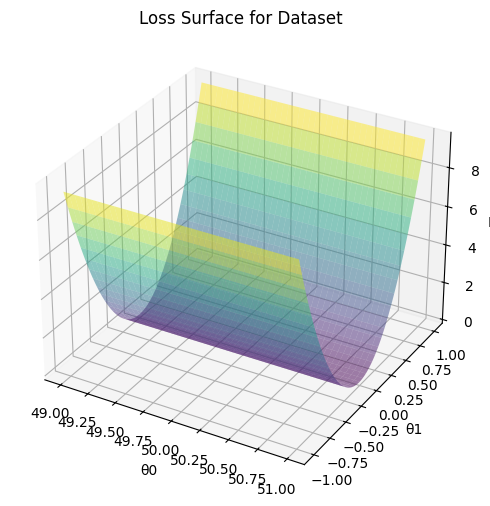

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(T0, T1, L, cmap="viridis" , alpha=0.5)
ax.set_xlabel("θ0")
ax.set_ylabel("θ1")
ax.set_zlabel("Loss")
plt.title("Loss Surface for Dataset")
plt.show()


### Plot Loss Surface for Dataset
plot the computed loss surface for the dataset to visualize how loss changes with $\theta_0$ and $\theta_1$.

In [13]:
best_index = np.unravel_index(np.argmin(L), L.shape)
best_theta0 = T0[best_index]
best_theta1 = T1[best_index]
best_loss = L[best_index]

print("Best θ0 =", best_theta0)
print("Best θ1 =", best_theta1)
print("Minimum Loss =", best_loss)


Best θ0 = 50.9999999999996
Best θ1 = -0.00999999999999912
Minimum Loss = 23.481868085094458


### Find Best θ and Minimum Loss for Dataset
values of $\theta_0$ and $\theta_1$ that minimize the loss for the dataset.

In [14]:
X = np.c_[np.ones(m), x]
y_vec = y.reshape(-1, 1)


### Data for Least Squares Solution
data matrix $X$ and target vector $y$ for solving linear regression using the least squares method.

In [15]:
theta_ls = np.linalg.pinv(X.T @ X) @ X.T @ y_vec
theta_ls = theta_ls.flatten()

print("θ0 (LS) =", theta_ls[0])
print("θ1 (LS) =", theta_ls[1])


θ0 (LS) = 49.23762989372224
θ1 (LS) = -0.008611934783282508


###Least Squares Solution
We use the least squares method to find the optimal parameters $\theta_0$ and $\theta_1$ for linear regression.

In [16]:
y_pred_ls = X @ theta_ls.reshape(-1,1)
loss_ls = np.sum((y_vec - y_pred_ls)**2) / m
print("Loss with LS θ =", loss_ls)


Loss with LS θ = 16.730323052045662


### Loss for Least Squares Solution
calculate the loss using the parameters obtained from the least squares method.

In [17]:
theta_random = np.array([40, 0.5]).reshape(-1,1)
y_pred_random = X @ theta_random
loss_random = np.sum((y_vec - y_pred_random)**2) / m
print("Loss with random θ =", loss_random)


Loss with random θ = 2408258.6835106383


## Refrences
1.https://developers.google.com/machine-learning/crash-course/linear-regression/loss  
2.https://www.geeksforgeeks.org/maths/least-square-method/